# Example - 68 - Launch Vehicle Performance

In this example, we illustrate the calculation of launch performance of various launch vehicles in AMAT.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
from AMAT.launcher import Launcher

In [3]:
launcher_01 = Launcher('Atlas V401', datafile='../launcher-data/atlas-v401.csv')
launcher_02 = Launcher('Atlas V551', datafile='../launcher-data/atlas-v551.csv')
launcher_03 = Launcher('Atlas V551 w-STAR48', datafile='../launcher-data/atlas-v551-w-star-48.csv')
launcher_04 = Launcher('Delta IVH', datafile='../launcher-data/delta-IVH.csv')
launcher_05 = Launcher('Delta IVH w-STAR48', datafile='../launcher-data/delta-IVH-w-star-48.csv')
launcher_06 = Launcher('Falcon Heavy Rec.', datafile='../launcher-data/falcon-heavy-reusable.csv')
launcher_07 = Launcher('Falcon Heavy Exp.', datafile='../launcher-data/falcon-heavy-expendable.csv')
launcher_08 = Launcher('Falcon Heavy Exp. w-STAR48', datafile='../launcher-data/falcon-heavy-expendable-w-star-48.csv')
launcher_09 = Launcher('Vulcan w-6 solids', datafile='../launcher-data/vulcan-centaur-w-6-solids.csv')
launcher_10 = Launcher('Vulcan w-6 solids w-STAR48', datafile='../launcher-data/vulcan-centaur-w-6-solids-w-star-48.csv')
launcher_11 = Launcher('SLS Block 1', datafile='../launcher-data/sls-block-1.csv')
launcher_12 = Launcher('SLS Block 1B', datafile='../launcher-data/sls-block-1B.csv')
launcher_13 = Launcher('SLS Block 1B w-kick stage', datafile='../launcher-data/sls-block-1B-with-kick.csv')

In [4]:
launchers = [launcher_01, launcher_02, launcher_03, launcher_04, launcher_05,
             launcher_06, launcher_07, launcher_08, launcher_09, launcher_10,
             launcher_11, launcher_12, launcher_13]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


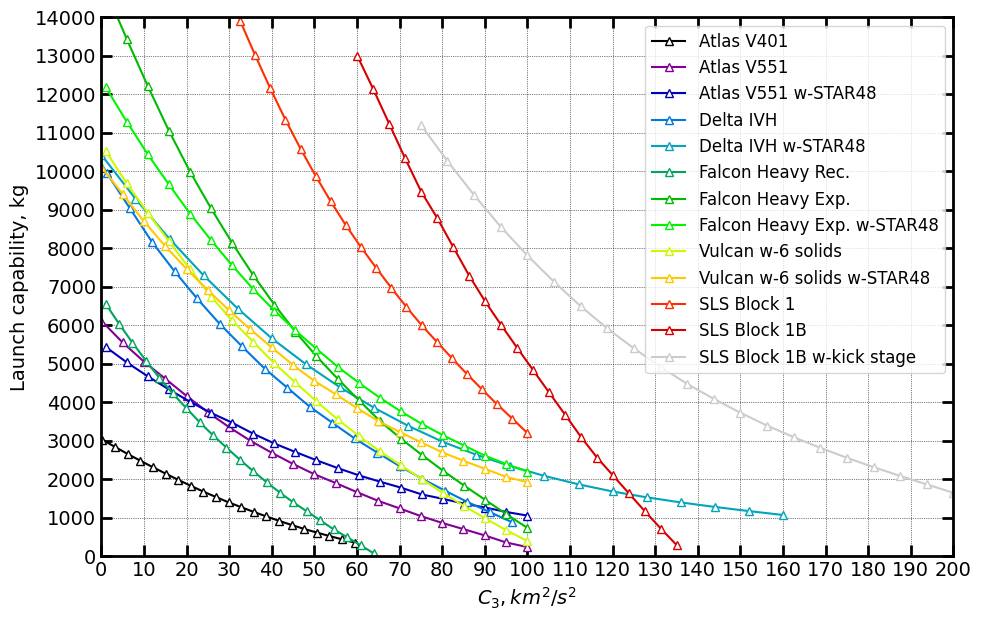

In [5]:
plt.figure(figsize=(11,7))
color_list = cm.nipy_spectral(np.linspace(0,1,len(launchers)))

for idx, launcher in enumerate(launchers):
    X = np.linspace(min(launcher.XY[:,0]), max(launcher.XY[:,0]), 21)
    Y = launcher.launchMass(X)
    
    plt.plot(X, Y, '^-', color=color_list[idx] ,markersize=6,  mfc='w', label=launcher.ID)
    
plt.xlabel(r'$C_3, km^2/s^2$' ,fontsize=14)
plt.ylabel("Launch capability, kg" ,fontsize=14)
plt.xticks(np.linspace(0, 200 , 21),fontsize=14)
plt.yticks(np.linspace(0, 14000 , 15),fontsize=14)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.xlim([-0.1,200])
plt.ylim([-10, 14000])

plt.legend(loc='upper right', fontsize=12, framealpha=0.8)

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')


ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.savefig('../plots/launch-vehicle-performance.png', dpi=300,bbox_inches='tight')
plt.savefig('../plots/launch-vehicle-performance.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/launch-vehicle-performance.eps', dpi=300,bbox_inches='tight')  

plt.show()